In [26]:
import tensorflow as tf
import tensorflow_datasets as data
import tensorflow_hub as hub



In [12]:
df,info=data.load(name='beans',with_info=True,as_supervised=True,split=['train','validation'])

In [4]:
info

tfds.core.DatasetInfo(
    name='beans',
    version=0.1.0,
    description='Beans is a dataset of images of beans taken in the field using smartphone
cameras. It consists of 3 classes: 2 disease classes and the healthy class.
Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
by experts from the National Crops Resources Research Institute (NaCRRI) in
Uganda and collected by the Makerere AI research lab.',
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=1295,
    splits={
        'test': 128,
        'train': 1034,
        'validation': 133,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {beansdata,
        author="Makerere AI Lab",
        title="Bean disease dataset",
        month="January",
        year="2020",
        url="https://git

In [18]:
def scale(image,label):
  image= tf.cast(image,tf.float32)
  image/=255.0
  return tf.image.resize(image,[224,224]),tf.one_hot(label,3)

In [56]:
traindata=df[0].map(scale).batch(25)
validation=df[1].map(scale).batch(25)
traindata.cache()
validation.cache()

<CacheDataset shapes: ((None, 224, 224, 3), (None, 3)), types: (tf.float32, tf.float32)>

In [22]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


In [28]:
feature_extractor_layer = hub.KerasLayer(
      feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [38]:
num_classes = 3

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes,activation='softmax')
    ])


In [62]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
      loss='categorical_crossentropy',
        metrics=['accuracy'])



In [65]:
history = model.fit(traindata,epochs=10,validation_data=validation)


Epoch 1/10
42/42 [==============================] - 3s 60ms/step - loss: 0.3191 - accuracy: 0.8694 - val_loss: 0.3270 - val_accuracy: 0.8872
Epoch 2/10
42/42 [==============================] - 2s 59ms/step - loss: 0.2874 - accuracy: 0.8839 - val_loss: 0.3156 - val_accuracy: 0.9023
Epoch 3/10
42/42 [==============================] - 3s 60ms/step - loss: 0.2622 - accuracy: 0.9043 - val_loss: 0.2908 - val_accuracy: 0.9098
Epoch 4/10
42/42 [==============================] - 3s 60ms/step - loss: 0.2602 - accuracy: 0.8994 - val_loss: 0.2763 - val_accuracy: 0.9173
Epoch 5/10
42/42 [==============================] - 3s 60ms/step - loss: 0.2408 - accuracy: 0.9062 - val_loss: 0.2728 - val_accuracy: 0.9173
Epoch 6/10
42/42 [==============================] - 3s 59ms/step - loss: 0.2279 - accuracy: 0.9110 - val_loss: 0.2636 - val_accuracy: 0.9173
Epoch 7/10
42/42 [==============================] - 3s 61ms/step - loss: 0.2187 - accuracy: 0.9130 - val_loss: 0.2647 - val_accuracy: 0.9173
Epoch 8/10
42

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [67]:
from keras.models import load_model
model.save("bean.h5")

In [69]:
from keras.preprocessing import image
import matplotlib.image as img

In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions

In [87]:
lst=['angular leaf spot','bean rust','healthy']

Model Prediction=> bean rust


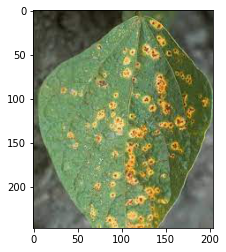

In [89]:
img_path='/bean rus.jfif'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)